# FIR LPF

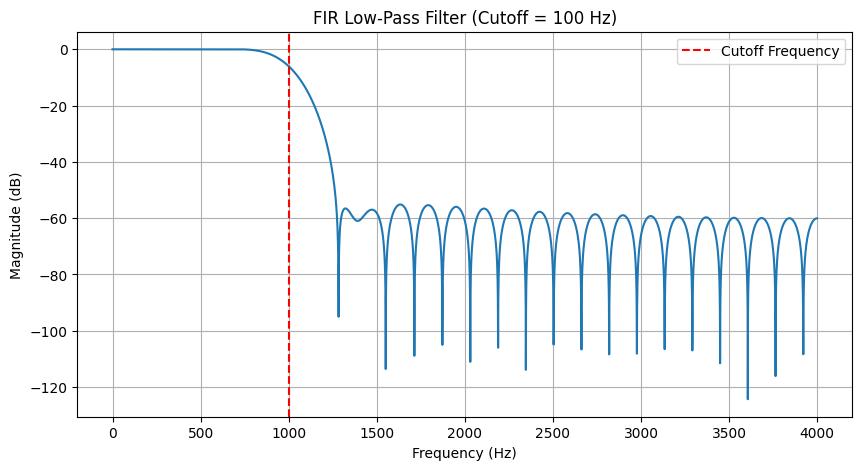

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, freqz, lfilter

# Parameter
fs = 8000       # Sampling rate (Hz)
fc = 1000        # Cutoff frequency (Hz)
N = 50          # Filter order
numtaps = N + 1 # Total number of taps

# Normalized cutoff
cutoff = fc / (fs / 2)  # normalized freq = 0.2

# FIR design with Hamming window
fir_coeff = firwin(numtaps, cutoff=cutoff, window='hamming')

# Frequency response
w, h = freqz(fir_coeff, worN=8000)
frequencies = w * fs / (2 * np.pi)

# Plot frequency response
plt.figure(figsize=(10, 5))
plt.plot(frequencies, 20 * np.log10(abs(h)))
plt.title('FIR Low-Pass Filter (Cutoff = 100 Hz)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.grid()
plt.axvline(fc, color='red', linestyle='--', label='Cutoff Frequency')
plt.legend()
plt.show()


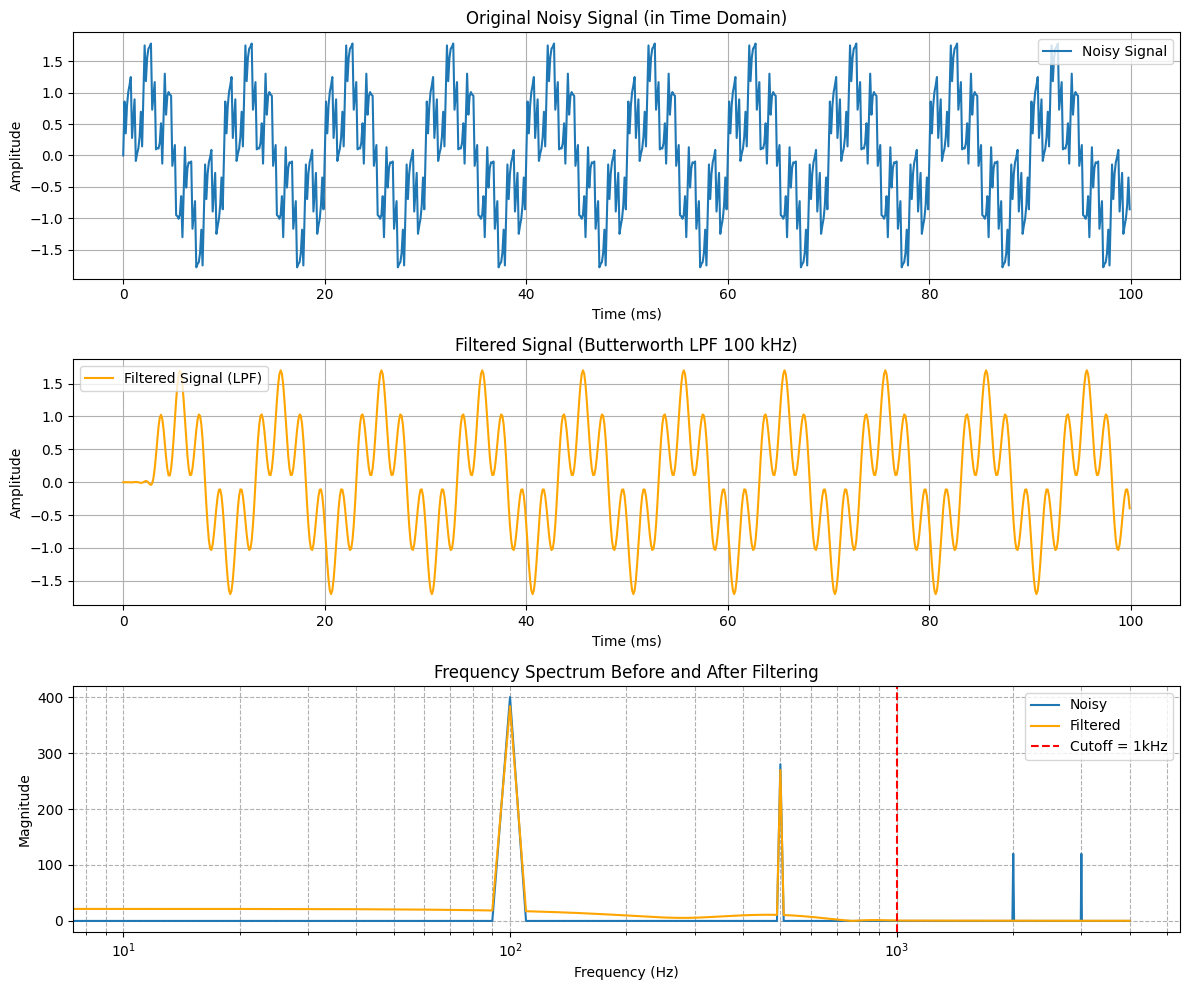

In [ ]:
T = 0.1                # Total duration (2 ms)
t = np.arange(0, T, 1/fs)

# === Simulated Time-Series Signal ===
# Signal components:
f1 = 100              # Desired signal component 1 (10 kHz)
f2 = 500              # Desired signal component 2 (50 kHz)
f3 = 2000             # Noise component 1 (200 kHz)
f4 = 3000             # Noise component 2 (400 kHz)

# Construct the signal
x = (np.sin(2*np.pi*f1*t) +
                0.7*np.sin(2*np.pi*f2*t) +
                0.3*np.sin(2*np.pi*f3*t) +
                0.3*np.sin(2*np.pi*f4*t))

# Filter sinyal
y = lfilter(fir_coeff, 1.0, x)

# === Plot Results ===
plt.figure(figsize=(12, 10))

plt.subplot(3, 1, 1)
plt.plot(t*1e3, x, label='Noisy Signal')
plt.title('Original Noisy Signal (in Time Domain)')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.grid()
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(t*1e3, y, label='Filtered Signal (LPF)', color='orange')
plt.title('Filtered Signal (Butterworth LPF 100 kHz)')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.grid()
plt.legend()

plt.subplot(3, 1, 3)
# Show frequency response using FFT
f_axis = np.fft.rfftfreq(len(t), 1/fs)
fft_noisy = np.abs(np.fft.rfft(x))
fft_filtered = np.abs(np.fft.rfft(y))
plt.semilogx(f_axis, fft_noisy, label='Noisy')
plt.semilogx(f_axis, fft_filtered, label='Filtered', color='orange')
plt.title('Frequency Spectrum Before and After Filtering')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(which='both', linestyle='--')
plt.axvline(fc, color='red', linestyle='--', label='Cutoff = 1kHz')
plt.legend()

plt.tight_layout()
plt.show()


# IIR LPF

Koefisien Numerator (b): [0.01020948 0.04083792 0.06125688 0.04083792 0.01020948]
Koefisien Denominator (a): [ 1.         -1.96842779  1.73586071 -0.72447083  0.1203896 ]


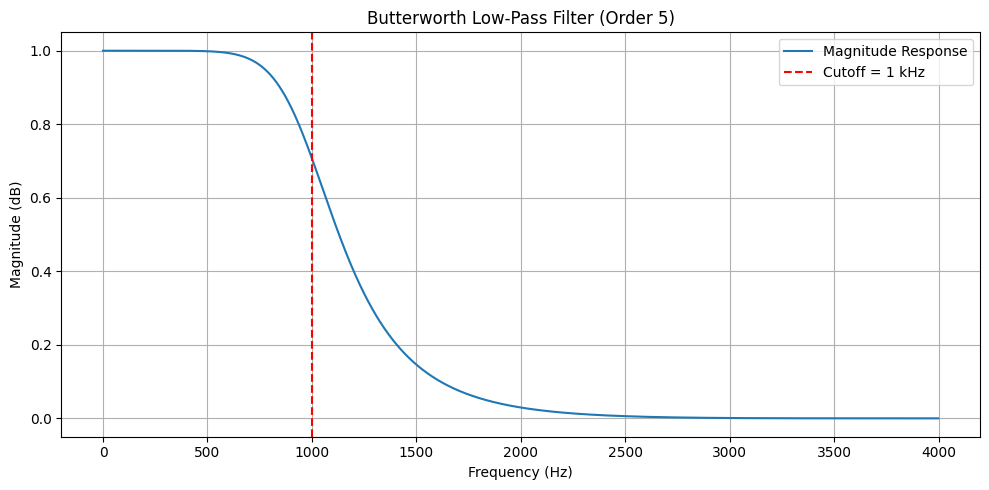

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Spesifikasi filter
fs = 8000       # Frekuensi sampling (Hz)
fc = 1000       # Frekuensi cutoff (Hz)
order = 4       # Orde filter

# Frekuensi cutoff ternormalisasi (terhadap Nyquist)
w_c = fc / (fs / 2)

# Desain filter Butterworth orde 5
b, a = signal.butter(N=order, Wn=w_c, btype='low', analog=False)

# Tampilkan koefisien filter
print("Koefisien Numerator (b):", b)
print("Koefisien Denominator (a):", a)

# Hitung respon frekuensi
w, h = signal.freqz(b, a, worN=2048)
frequencies = w * fs / (2 * np.pi)

# Plot magnitude response
plt.figure(figsize=(10, 5))
plt.plot(frequencies, np.abs(h), label='Magnitude Response')
plt.axvline(fc, color='r', linestyle='--', label='Cutoff = 1 kHz')
plt.title('Butterworth Low-Pass Filter (Order 5)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


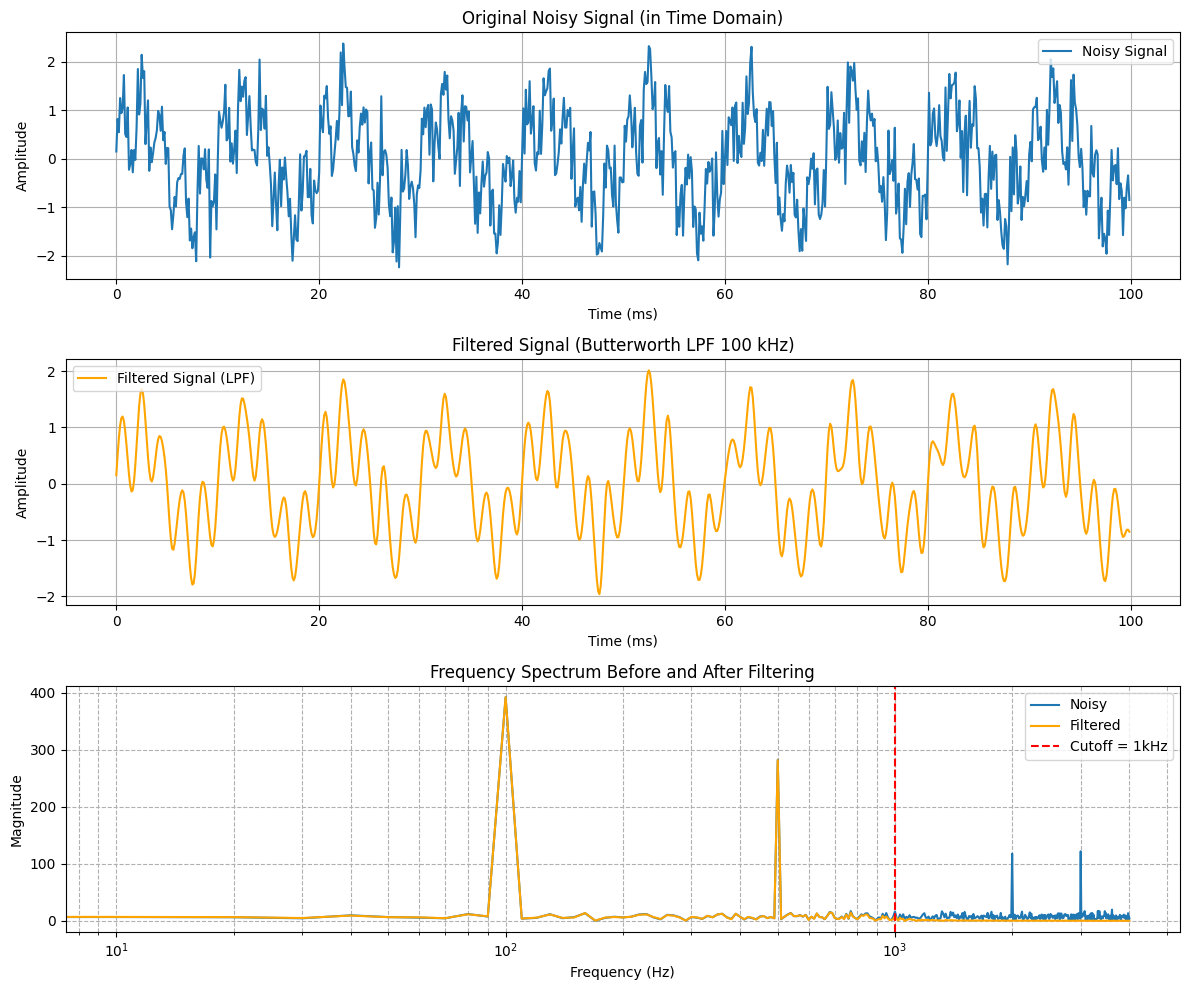

In [ ]:
T = 0.1                # Total duration (2 ms)
t = np.arange(0, T, 1/fs)

# === Simulated Time-Series Signal ===
# Signal components:
f1 = 100              # Desired signal component 1 (10 kHz)
f2 = 500              # Desired signal component 2 (50 kHz)
f3 = 2000             # Noise component 1 (200 kHz)
f4 = 3000             # Noise component 2 (400 kHz)

# Construct the signal
signal_clean = (np.sin(2*np.pi*f1*t) +
                0.7*np.sin(2*np.pi*f2*t) +
                0.3*np.sin(2*np.pi*f3*t) +
                0.3*np.sin(2*np.pi*f4*t))

# Add Gaussian noise
np.random.seed(42)
noise = 0.3 * np.random.normal(size=len(t))
signal_noisy = signal_clean + noise

# === Design LPF ===
# cutoff = 100_000                 # Cutoff frequency: 100 kHz
# order = 5                        # Filter order
# w_c = cutoff / (fs / 2)          # Normalized cutoff
# b, a = signal.butter(order, w_c, btype='low')

# Apply filter
signal_filtered = signal.filtfilt(b, a, signal_noisy)

# === Plot Results ===
plt.figure(figsize=(12, 10))

plt.subplot(3, 1, 1)
plt.plot(t*1e3, signal_noisy, label='Noisy Signal')
plt.title('Original Noisy Signal (in Time Domain)')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.grid()
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(t*1e3, signal_filtered, label='Filtered Signal (LPF)', color='orange')
plt.title('Filtered Signal (Butterworth LPF 100 kHz)')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.grid()
plt.legend()

plt.subplot(3, 1, 3)
# Show frequency response using FFT
f_axis = np.fft.rfftfreq(len(t), 1/fs)
fft_noisy = np.abs(np.fft.rfft(signal_noisy))
fft_filtered = np.abs(np.fft.rfft(signal_filtered))
plt.semilogx(f_axis, fft_noisy, label='Noisy')
plt.semilogx(f_axis, fft_filtered, label='Filtered', color='orange')
plt.title('Frequency Spectrum Before and After Filtering')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(which='both', linestyle='--')
plt.axvline(fc, color='red', linestyle='--', label='Cutoff = 1kHz')
plt.legend()

plt.tight_layout()
plt.show()


# FIR HPF

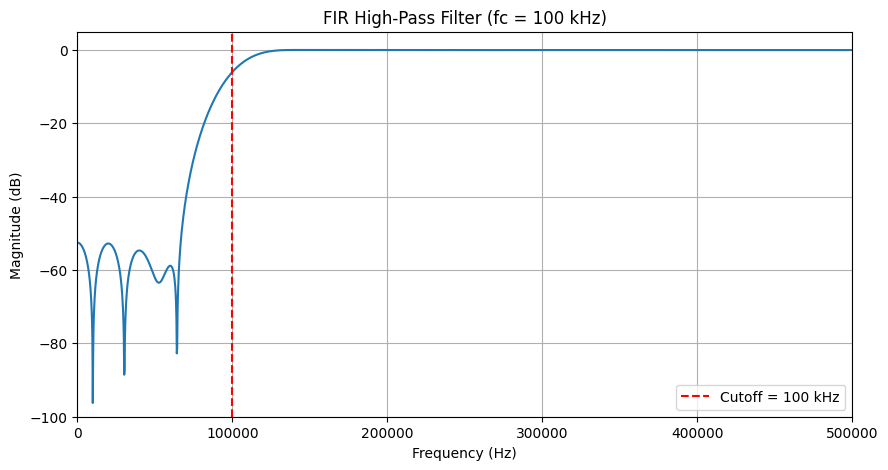

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

# Parameter
fs = 1_000_000     # Sampling frequency: 1 MHz
fc = 100_000       # Cutoff frequency: 100 kHz
N = 50             # Filter order
M = N // 2
n = np.arange(N+1)
fc_norm = fc / fs  # = 0.1

# Impulse response of ideal HPF
hd = np.zeros(N+1)
for i in n:
    if i == M:
        hd[i] = 1 - 2 * fc_norm
    else:
        hd[i] = -np.sin(2 * np.pi * fc_norm * (i - M)) / (np.pi * (i - M))

# Hamming window
w = 0.54 - 0.46 * np.cos(2 * np.pi * n / N)

# FIR HPF coefficients
h = hd * w

# Frequency response
w_freq, H = freqz(h, worN=2048)
f = w_freq * fs / (2 * np.pi)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(f, 20 * np.log10(np.abs(H)))
plt.title('FIR High-Pass Filter (fc = 100 kHz)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.grid()
plt.axvline(fc, color='red', linestyle='--', label='Cutoff = 100 kHz')
plt.legend()
plt.xlim(0, fs/2)
plt.ylim(-100, 5)
plt.show()


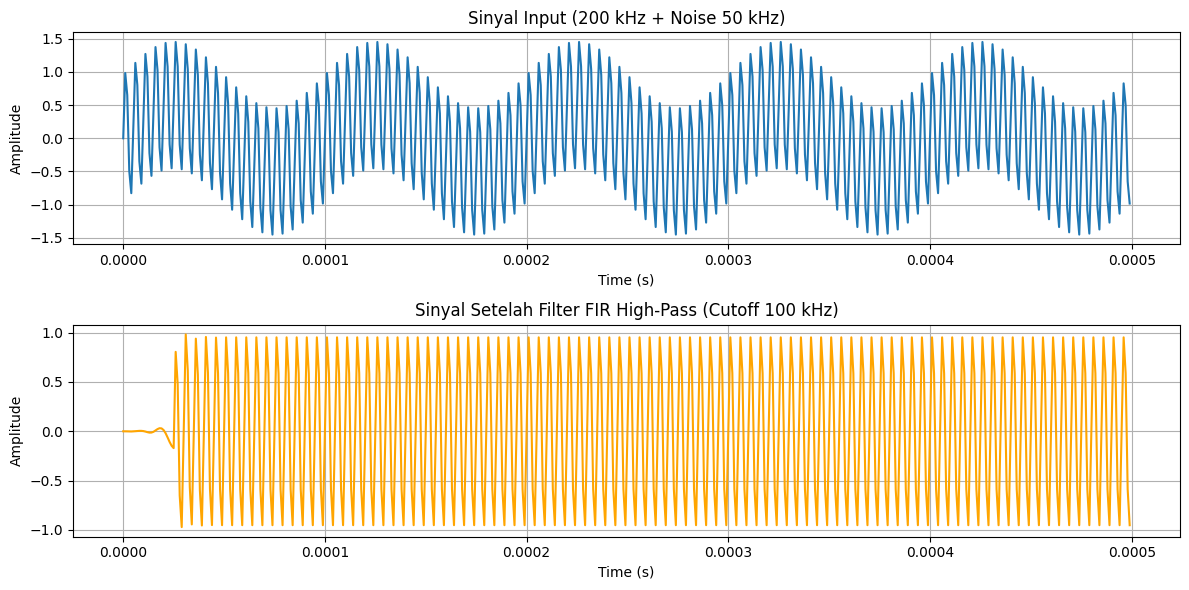

In [ ]:
# ----------------------
# Simulasi sinyal input
# ----------------------

t = np.arange(0, 0.001, 1/fs)  # 1 ms durasi
x_main = np.sin(2*np.pi*200_000*t)  # Sinyal utama 200 kHz
x_noise = 0.5 * np.sin(2*np.pi*10_000*t)  # Noise 50 kHz
x = x_main + x_noise  # Sinyal gabungan

# Terapkan filter
y = lfilter(h, 1.0, x)

# ----------------------
# Plot hasil
# ----------------------

plt.figure(figsize=(12, 6))

plt.subplot(2,1,1)
plt.plot(t[:500], x[:500])
plt.title('Sinyal Input (200 kHz + Noise 50 kHz)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()

plt.subplot(2,1,2)
plt.plot(t[:500], y[:500], color='orange')
plt.title('Sinyal Setelah Filter FIR High-Pass (Cutoff 100 kHz)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()

plt.tight_layout()
plt.show()


# IIR HPF

Koefisien Numerator (b): [ 0.43284664 -1.73138658  2.59707987 -1.73138658  0.43284664]
Koefisien Denominator (a): [ 1.         -2.36951301  2.31398841 -1.05466541  0.18737949]


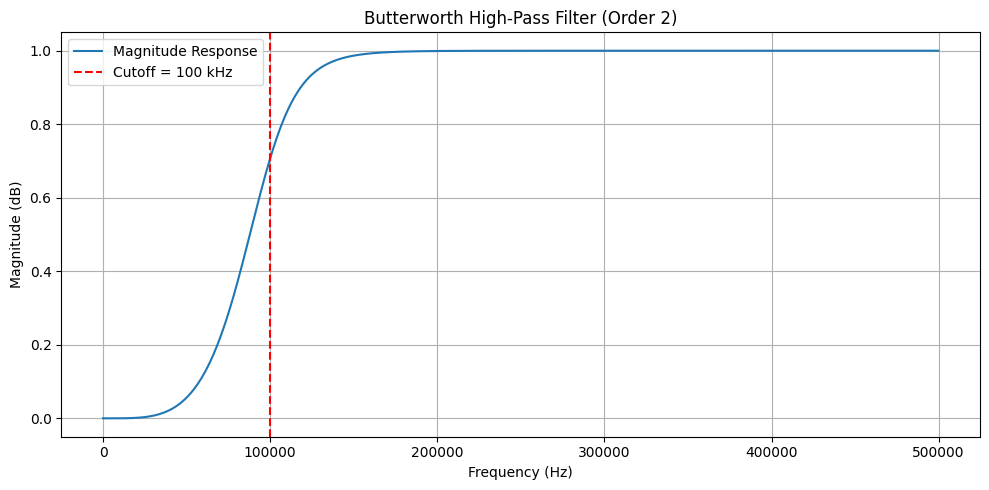

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Spesifikasi filter
fs = 1e6         # Sampling frequency = 1 MHz
fc = 1e5         # Cutoff frequency = 100 kHz
order = 4        # Filter order

# Frekuensi normalisasi terhadap Nyquist (fs/2)
w_c = fc / (fs / 2)

# Desain HPF Butterworth
w_c = fc / (fs / 2)      # Normalized cutoff
b, a = butter(order, w_c, btype='high', analog=False)

# Filter menggunakan filtfilt untuk zero-phase

# Tampilkan koefisien
print("Koefisien Numerator (b):", b)
print("Koefisien Denominator (a):", a)

# Hitung respon frekuensi
w, h = signal.freqz(b, a, worN=2048)
frequencies = w * fs / (2 * np.pi)

# Plot magnitude response
plt.figure(figsize=(10, 5))
plt.plot(frequencies, np.abs(h), label='Magnitude Response')
plt.axvline(fc, color='r', linestyle='--', label='Cutoff = 100 kHz')
plt.title('Butterworth High-Pass Filter (Order 2)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


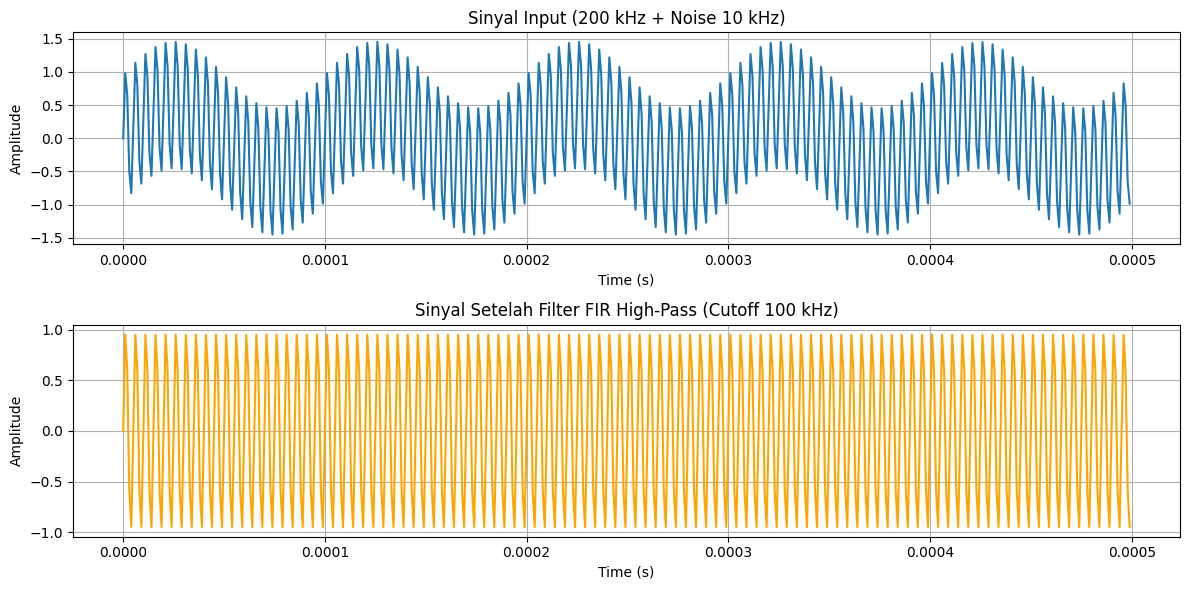

In [ ]:
# ----------------------
# Simulasi sinyal input
# ----------------------

t = np.arange(0, 0.001, 1/fs)  # 1 ms durasi
x_main = np.sin(2*np.pi*200_000*t)  # Sinyal utama 200 kHz
x_noise = 0.5 * np.sin(2*np.pi*10_000*t)  # Noise 50 kHz
x = x_main + x_noise  # Sinyal gabungan

# Terapkan filter
y = filtfilt(b, a, x)

# ----------------------
# Plot hasil
# ----------------------

plt.figure(figsize=(12, 6))

plt.subplot(2,1,1)
plt.plot(t[:500], x[:500])
plt.title('Sinyal Input (200 kHz + Noise 10 kHz)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()

plt.subplot(2,1,2)
plt.plot(t[:500], y[:500], color='orange')
plt.title('Sinyal Setelah Filter FIR High-Pass (Cutoff 100 kHz)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()

plt.tight_layout()
plt.show()

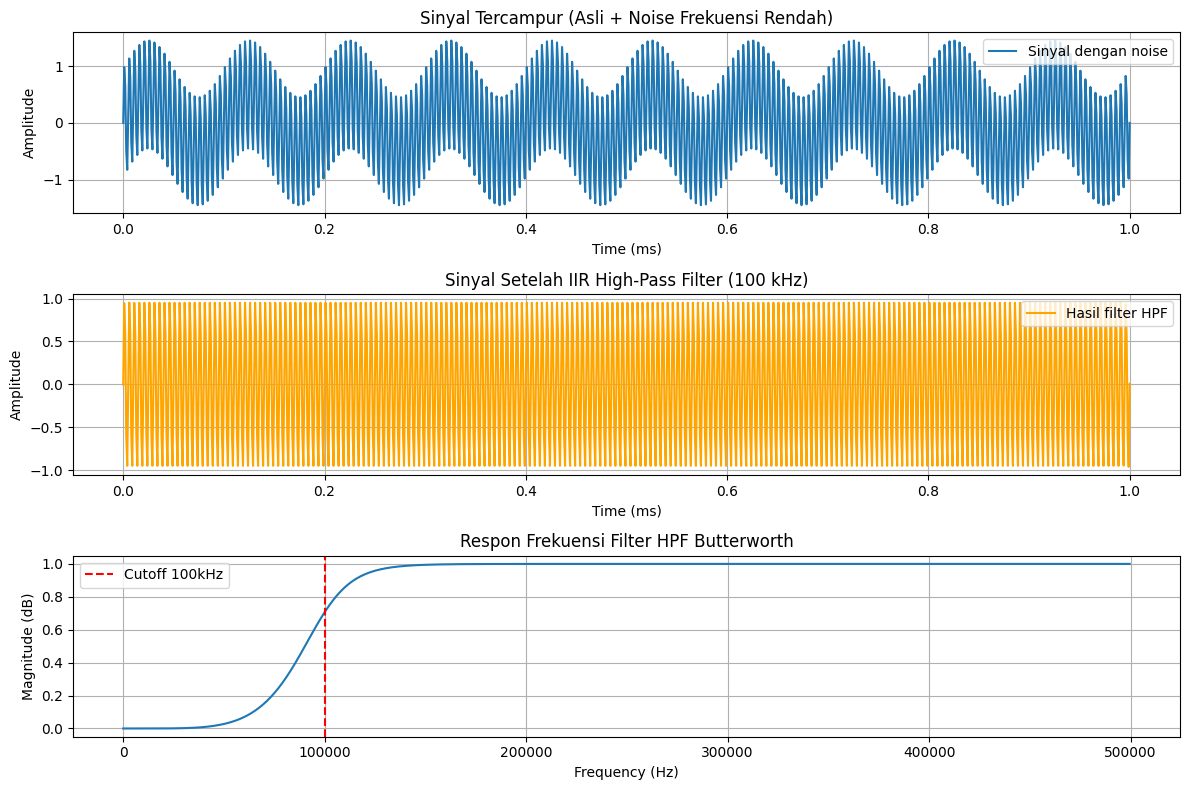

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, freqz

# Sampling and filter config
fs = 1_000_000   # 1 MHz
fc = 100_000     # Cutoff 100 kHz
order = 5        # Filter order

# Waktu simulasi
T = 0.001
t = np.arange(0, T, 1/fs)

# Buat sinyal campuran
signal_high = np.sin(2*np.pi*200e3*t)           # sinyal informasi 300 kHz
noise_low = 0.5*np.sin(2*np.pi*10e3*t)          # noise 10 kHz (low freq)
# np.random.seed(42)
# noise_random = 0.2 * np.random.normal(size=len(t))  # noise acak kecil
# x = signal_high + noise_low + noise_random       # sinyal tercampur
x = signal_high + noise_low 

# Desain HPF Butterworth
w_c = fc / (fs / 2)      # Normalized cutoff
b, a = butter(order, w_c, btype='high', analog=False)

# Filter menggunakan filtfilt untuk zero-phase
y = filtfilt(b, a, x)

# Plot sinyal sebelum dan sesudah filter
plt.figure(figsize=(12, 8))

plt.subplot(3,1,1)
plt.plot(t*1e3, x, label='Sinyal dengan noise')
plt.title("Sinyal Tercampur (Asli + Noise Frekuensi Rendah)")
plt.xlabel("Time (ms)")
plt.ylabel("Amplitude")
plt.grid()
plt.legend()

plt.subplot(3,1,2)
plt.plot(t*1e3, y, color='orange', label='Hasil filter HPF')
plt.title("Sinyal Setelah IIR High-Pass Filter (100 kHz)")
plt.xlabel("Time (ms)")
plt.ylabel("Amplitude")
plt.grid()
plt.legend()

# Tampilkan respon frekuensi
w, h = freqz(b, a, worN=1024)
freq = w * fs / (2 * np.pi)
plt.subplot(3,1,3)
plt.plot(freq, abs(h))
plt.axvline(fc, color='red', linestyle='--', label="Cutoff 100kHz")
plt.title("Respon Frekuensi Filter HPF Butterworth")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude (dB)")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()
